# Introduction

The questions answered in notebook are the following:

    1. Which are the most relevant client’s traits and how can they be group to get a better understanding of them? 
    2. How does the open rate of emails behave in young clients, 18 to 30 years old?
    3. Is a multivariate regression model based on the variables identified an acceptable model to predict open rate?
 

## 1. Which are the most relevant client’s traits and how can they be group to get a better understanding of them?


In this project I used different groups of features that could describe our client more holistically and extracted the data based on this approach. The groups and variables I used are the following:

Demographic: Gender, age and income.
Psychographic: transactional forecasted affinities.
Business related: savings and investments products.
Behavioral: Digital affinity, saving behavior, spending behavior and credit behavior, credit score.
Geographical: City.

Based on this the data available is the following:

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import AllTogether as t
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

### Data Understanding

In [2]:
df = pd.read_csv("df_ds.csv", sep=',')
df.head()

,edad_cliente,departamento_correspondencia,cr_hipotecario,dafuturo,cdt,fond,ingreso_2,act_laboral_general,acierta_plus,categoria_gasto,categoria_ahorro,categoria_credito,madurez_financiera,open_rate,quanto,con_gusto_agrupado,con_digital_d
0,18,"BOGOTA, D.C.",0,0,0,0,908526,NaN,\N,\N,\N,\N,0,NaN,\N,sin_informacion,No_digital
1,24,NaN,0,0,0,0,\N,NaN,1,\N,\N,\N,0,NaN,1135,sin_informacion,No_digital
2,18,NaN,0,0,0,0,\N,NaN,0,\N,\N,\N,0,NaN,1299,sin_informacion,No_digital
3,19,VALLE DEL CAUCA,0,0,0,0,\N,NaN,733,\N,\N,\N,0,NaN,1281,sin_informacion,No_digital
4,26,"BOGOTA, D.C.",0,0,0,0,1149212,EMPLEADO,150,\N,\N,\N,0,NaN,1853,sin_informacion,No_digital


### Data cleaning

Cleaning functions

In [3]:
# Remove "\N"s characters from all features. Input (df)
def remove_blanks(df):
    df.fillna(np.nan,inplace=True)
    df = df.applymap(lambda col: np.nan if col == "\\N" else col)
    return df

#def nans_to_mode(df):


In [4]:
df = remove_blanks(df)

In [5]:
# Fix nans of categorical values, replace them with "sin_informacion"
df["categoria_gasto"].fillna("sin_informacion", inplace=True)
df["categoria_ahorro"].fillna("sin_informacion", inplace=True)
df["categoria_credito"].fillna("sin_informacion", inplace=True)
df["act_laboral_general"].fillna("sin_informacion", inplace=True)
df["departamento_correspondencia"].fillna("sin_informacion", inplace=True)
df["con_gusto_agrupado"].fillna("sin_informacion", inplace=True)
df["con_digital_d"].fillna("sin_informacion", inplace=True)

In [6]:
# Fix numerical columns
df['ingreso_2'].fillna(int(df['ingreso_2'].mode()), inplace=True)
df['acierta_plus'].fillna(int(df['acierta_plus'].mode()), inplace=True)
df['quanto'].fillna(int(df['quanto'].mode()), inplace=True)

# Change these column types to float
df['acierta_plus'] = df['acierta_plus'].astype(str).astype(float)
df['ingreso_2'] = df['ingreso_2'].astype(str).astype(float)
df['quanto'] = df['quanto'].astype(str).astype(float)

In [7]:
# Categorical values to dummies
cat_vars = df.select_dtypes(include=['object']).copy().columns

for var in cat_vars:
    df = pd.concat([df.drop(var, axis=1),
                    pd.get_dummies(df[var],
                                   prefix=var,
                                   prefix_sep='_',
                                   drop_first=True)], axis=1)
del cat_vars, var

## 2. How does the open rate of emails behave in young clients, 18 to 30 years old?

###  Data analysis

In [8]:
df.head()

,edad_cliente,cr_hipotecario,dafuturo,cdt,fond,ingreso_2,acierta_plus,madurez_financiera,open_rate,quanto,...,con_gusto_agrupado_Gimnasios,con_gusto_agrupado_Hogar,con_gusto_agrupado_Mascotas,con_gusto_agrupado_Restaurante,con_gusto_agrupado_Supermercado,con_gusto_agrupado_Tecnologia,con_gusto_agrupado_Viajes,con_gusto_agrupado_sin_informacion,con_digital_d_No_digital,con_digital_d_sin_informacion
0,18,0,0,0,0,908526.0,0.0,0,NaN,1244.0,...,0,0,0,0,0,0,0,1,1,0
1,24,0,0,0,0,908526.0,1.0,0,NaN,1135.0,...,0,0,0,0,0,0,0,1,1,0
2,18,0,0,0,0,908526.0,0.0,0,NaN,1299.0,...,0,0,0,0,0,0,0,1,1,0
3,19,0,0,0,0,908526.0,733.0,0,NaN,1281.0,...,0,0,0,0,0,0,0,1,1,0
4,26,0,0,0,0,1149212.0,150.0,0,NaN,1853.0,...,0,0,0,0,0,0,0,1,1,0


In [9]:
df.dtypes

edad_cliente                          int64
cr_hipotecario                        int64
dafuturo                              int64
cdt                                   int64
fond                                  int64
                                      ...  
con_gusto_agrupado_Tecnologia         uint8
con_gusto_agrupado_Viajes             uint8
con_gusto_agrupado_sin_informacion    uint8
con_digital_d_No_digital              uint8
con_digital_d_sin_informacion         uint8
Length: 76, dtype: object

In [10]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
edad_cliente,20000.0,24.99920,3.429488,18.0,22.0,25.0,28.0,30.0
cr_hipotecario,20000.0,0.00590,0.076586,0.0,0.0,0.0,0.0,1.0
dafuturo,20000.0,0.00290,0.053775,0.0,0.0,0.0,0.0,1.0
cdt,20000.0,0.00190,0.043549,0.0,0.0,0.0,0.0,1.0
fond,20000.0,0.00730,0.085130,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
con_gusto_agrupado_Tecnologia,20000.0,0.00010,0.010000,0.0,0.0,0.0,0.0,1.0
con_gusto_agrupado_Viajes,20000.0,0.00220,0.046854,0.0,0.0,0.0,0.0,1.0
con_gusto_agrupado_sin_informacion,20000.0,0.95530,0.206650,0.0,1.0,1.0,1.0,1.0
con_digital_d_No_digital,20000.0,0.82725,0.378040,0.0,1.0,1.0,1.0,1.0


A great way of describing and visualizating data is through histograms, for open rates the results are the following:

<AxesSubplot:>

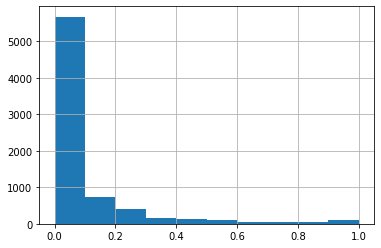

In [25]:
df.open_rate.hist()

Descriptive statistics are also great for analyzing this feature.

In [29]:
df.open_rate.describe(include='all').T.reset_index()

,index,open_rate
0,count,7471.000000
1,mean,0.089862
2,std,0.181244
3,min,0.000000
4,25%,0.000000
5,50%,0.010000
6,75%,0.090000
7,max,1.000000


## 3. Is a multivariate regression model based on the variables identified an acceptable model to predict open rate?

### Modeling

In [11]:
#filter for model set
df = df.dropna(subset=['open_rate'], axis=0)

In [12]:
y = df['open_rate']
x = df.drop(['open_rate'], 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True) 
lm_model.fit(x_train, y_train)
y_test_preds = lm_model.predict(x_test)

### Evaluate

In [14]:
"r-squared score was {} on {} values.".format(r2_score(y_test,y_test_preds),len(y_test))

'r-squared score was 0.011686980776914546 on 2242 values.'

### Re model

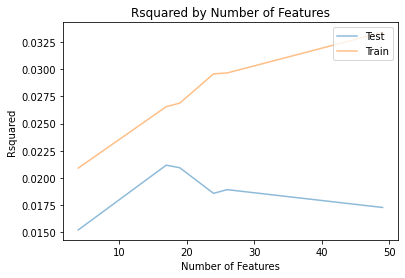

17
0.021169683116173954
0.02655591990745887


In [17]:
# Model optimization
cutoffs = [10000, 50000, 35000, 25000, 10000, 1000, 500, 300, 250, 50]

r2_scores_test, r2_scores_train, lm_model, x_train, x_test, y_train, y_test = t.find_optimal_lm_mod(x, y, cutoffs)

print(x_train.shape[1])  # Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)])  # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)])  # The model we should implement train_r2


The r^2 is too low to use this model in production, it's recomended to look for other models in order to get a better fit. Which is the conclusion of this project, random forest is a suggestion that should be evaluated.